# Map to World Coordinates

![alt text](images/screen-shot-2017-05-03-at-7.45.26-pm.png)

The environment you will be navigating with the rover in this project is roughly 200 x 200 meters and looks like the image above from a top-down view. The white areas represent the navigable terrain. You will be provided a copy of this map with the project at a resolution of 1 square meter per pixel (same as shown above). Your goal in this exercise is to write code that will allow you to use the rover's position, orientation and camera image to map its environment and compare against this ground truth map!

 ![alt text](images/screen-shot-2017-05-03-at-7.51.28-pm.png)

# Rotation and Translation
Now that you have generated a map of navigable terrain in rover-centric coordinates, the next step is to map those points to world coordinates. To do this, you'll use a [rotation](https://en.wikipedia.org/wiki/Rotation_matrix) followed by a [translation](https://en.wikipedia.org/wiki/Translation_(geometry)). The rotation is required to account for the fact that when the camera takes a picture, the rover can be pointing in any arbitrary direction, given by its yaw angle. The translation is to account for the fact that the rover may be located at any position in the world when it takes a picture. So, it's a 2-step process:

1. Rotate the rover-centric coordinates so that the x and y axes are parallel to the axes in world space.
2. Translate the rotated positions by the x and y position values given by the rover's location (position vector) in the world.


Let's start with the rotation. The yaw angle is measured counterclockwise from the positive x-direction like this:

![alt text](images/screen-shot-2017-05-21-at-1.26.20-pm.png)

The first task is to perform a rotation. You'll accomplish this by applying a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) to your rover space pixel values (let's call them xpix and ypix). For a rotation through an angle θ, the operation looks like this:

 ![alt text](images/screen-shot-2017-04-30-at-5.24.52-pm.png)

Or written out explicitly it looks like this:

![alt text](images/screen-shot-2017-04-30-at-5.26.29-pm.png)

Or in code, you could write it up like this (passing in `xpix` and `ypix` as our original pixel positions and `yaw` as our yaw angle:

```python
import numpy as np
# yaw angle is recorded in degrees so first convert to radians
yaw_rad = yaw * np.pi / 180
x_rotated = xpix * np.cos(yaw_rad) - ypix * np.sin(yaw_rad)
y_rotated = xpix * np.sin(yaw_rad) + ypix * np.cos(yaw_rad)
```

The next step in mapping to world coordinates is to perform a [translation](https://en.wikipedia.org/wiki/Translation_(geometry)) by simply adding the x and y components of the rover's position to the `x_rotated` and `y_rotated` values calculated above.

Keep in mind, however, the scale associated with pixels in rover space versus world space. If, for example, as suggested in the previous exercise, you have mapped pixels in rover space such that each represents 0.1 x 0.1 m, and in your world map (as will be the case in the project) each pixel is 1 x 1 m, then you need to divide your rover space pixel values by 10 before mapping to world space. In that case, assuming the x and y position of the rover are given as `xpos` and `ypos`:

```python
# Assume a scale factor of 10 between world space pixels and rover space pixels
scale = 10
# Perform translation and convert to integer since pixel values can't be float
x_world = np.int_(xpos + (x_rotated / scale))
y_world = np.int_(ypos + (y_rotated / scale))
```

Ultimately you would like to add these new pixels to your map, but you may have inadvertently generated values that fall outside your map if the rover was near the edge of the world, so you should also truncate the values to be within the allowable range given by the map size using the `np.clip()` function

Alright, so let's put it all together! Your goal in this next exercise is to write two functions, one to apply a rotation and one to perform a scaling and translation. I'll provide you with a third function that applies these two in succession and then does the clipping step. So it'll look like this:

```python
# Define a function to apply a rotation to pixel positions
def rotate_pix(xpix, ypix, yaw):
    # TODO:
    # Convert yaw to radians
    # Apply a rotation
    # Return the result  

# Define a function to perform a translation
def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # TODO:
    # Apply a scaling and a translation
    # Return the result  
```

*Note: we're choosing random numbers for yaw and position, such that running the code multiple times will produce different outputs each time.*

In [16]:
def perspect_transform(img, src, dst):
    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped


def color_thresh(img, rgb_thresh=(170, 170, 170)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:, :, 0])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:, :, 0] > rgb_thresh[0]) \
                   & (img[:, :, 1] > rgb_thresh[1]) \
                   & (img[:, :, 2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = np.absolute(ypos - binary_img.shape[0]).astype(float)
    y_pixel = -(xpos - binary_img.shape[0]).astype(float)
    return x_pixel, y_pixel

In [17]:
# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))

    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated


def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale):
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated

Xpos = [170.87023357] Ypos = [165.78845832] Yaw = [267.49544222]


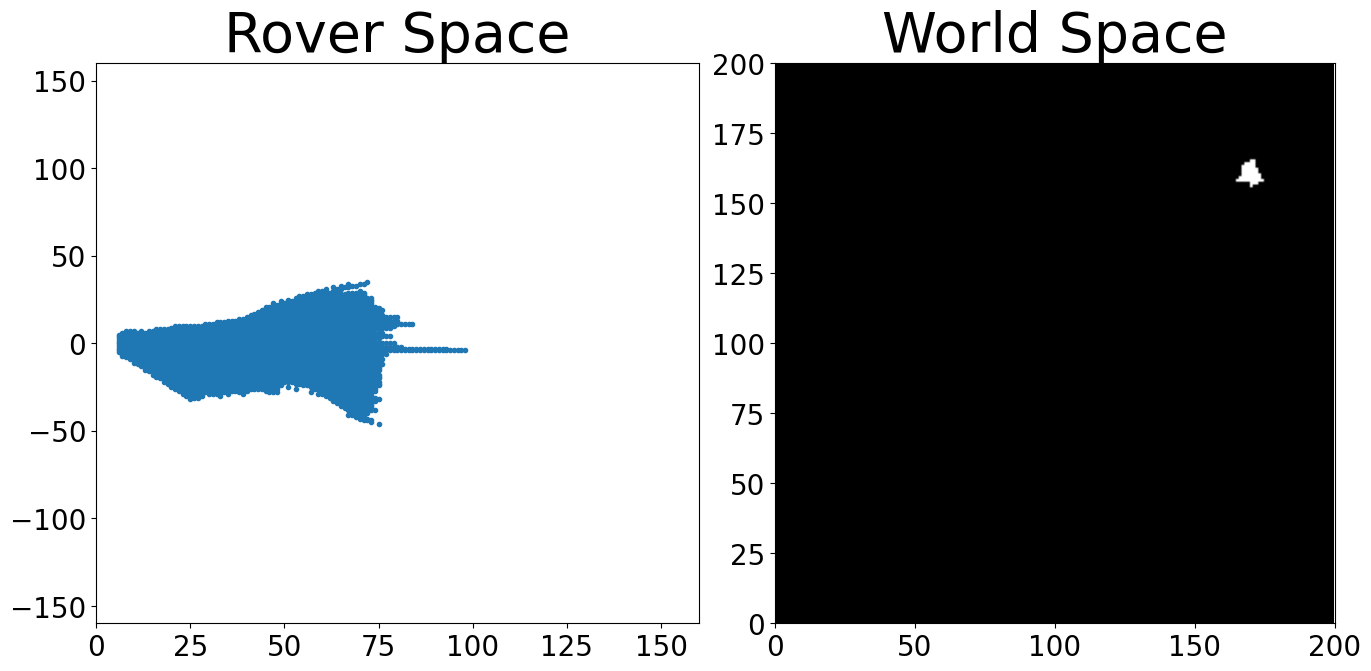

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the sample image
image = mpimg.imread('images/sample.jpg')

# Rover yaw values will come as floats from 0 to 360
# Generate a random value in this range
# Note: you need to convert this to radians
# before adding to pixel_angles
rover_yaw = np.random.random(1) * 360

# Generate a random rover position in world coords
# Position values will range from 20 to 180 to 
# avoid the edges in a 200 x 200 pixel world
rover_xpos = np.random.random(1) * 160 + 20
rover_ypos = np.random.random(1) * 160 + 20


# Note: Since we've chosen random numbers for yaw and position, 
# multiple run of the code will result in different outputs each time.

# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Clip to world_size
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world


# No need to modify code below here
# Perform warping and color thresholding
##########
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301, 140], [200, 96], [118, 96]])
destination = np.float32([[image.shape[1] / 2 - dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          [image.shape[1] / 2 - dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          ])
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Extract navigable terrain pixels
xpix, ypix = rover_coords(colorsel)
# Generate 200 x 200 pixel worldmap
worldmap = np.zeros((200, 200))
scale = 10
# Get navigable pixel positions in world coords
x_world, y_world = pix_to_world(xpix, ypix, rover_xpos,
                                rover_ypos, rover_yaw,
                                worldmap.shape[0], scale)
# Add pixel positions to worldmap
worldmap[y_world, x_world] += 1
print('Xpos =', rover_xpos, 'Ypos =', rover_ypos, 'Yaw =', rover_yaw)
# Plot the map in rover-centric coords

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
f.tight_layout()
ax1.plot(xpix, ypix, '.')
ax1.set_title('Rover Space', fontsize=40)
ax1.set_ylim(-160, 160)
ax1.set_xlim(0, 160)
ax1.tick_params(labelsize=20)

ax2.imshow(worldmap, cmap='gray')
ax2.set_title('World Space', fontsize=40)
ax2.set_ylim(0, 200)
ax2.tick_params(labelsize=20)
ax2.set_xlim(0, 200)

plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
plt.show()  # Uncomment if running on your local machine